In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read Data Set

In [2]:
train=pd.read_csv('/content/Project -23 train_loanPrediction.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Understanding the data

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.shape

(614, 13)

In [6]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# Independent Variable(categorical)

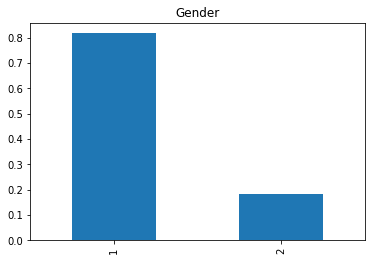

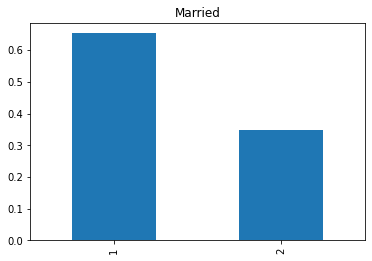

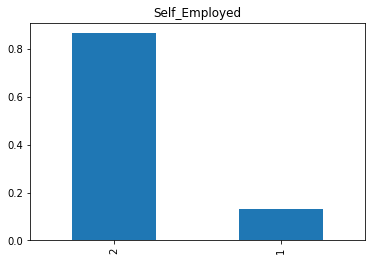

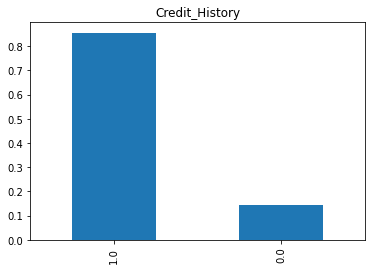

In [59]:
train['Gender'].value_counts(normalize=True).plot.bar( title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

# Independent Variable (Ordinal)

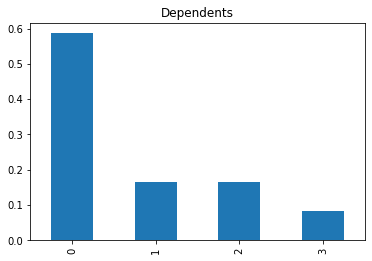

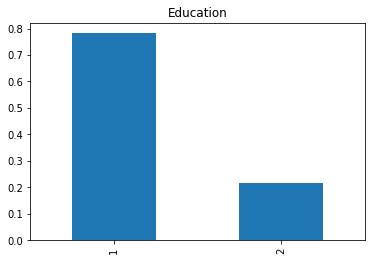

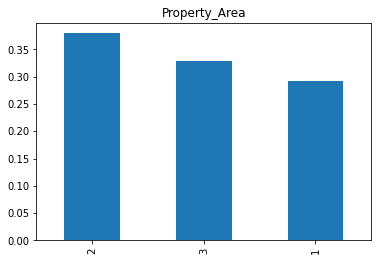

In [60]:
train['Dependents'].value_counts(normalize=True).plot.bar( title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

# Independent Variable (Numerical)

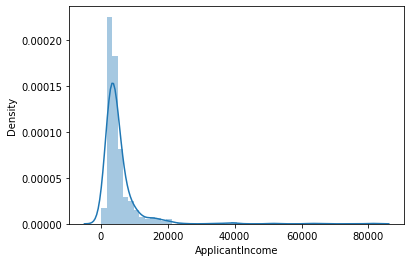

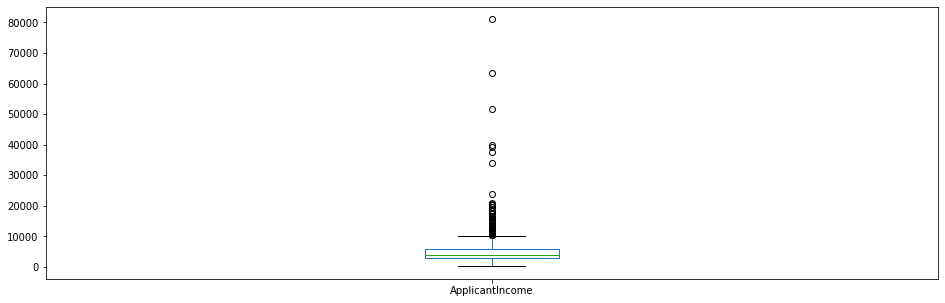

In [10]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, ' ')

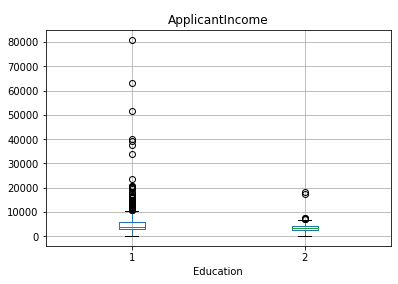

In [65]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle(" ")

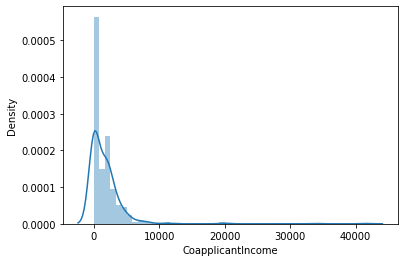

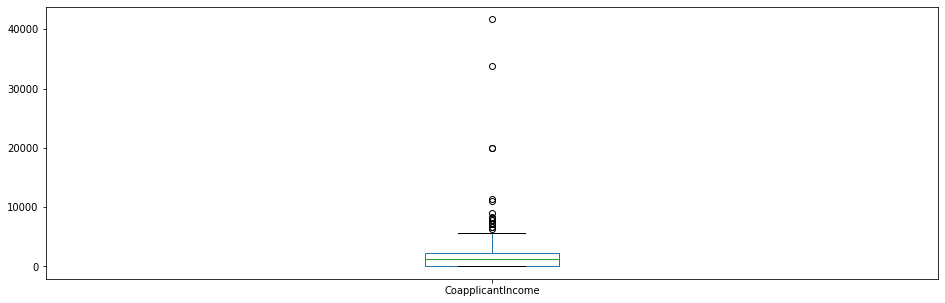

In [12]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

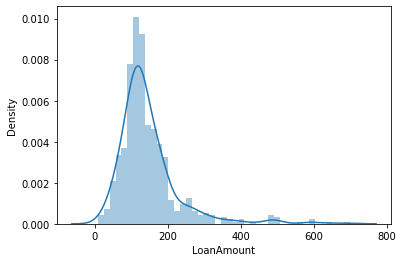

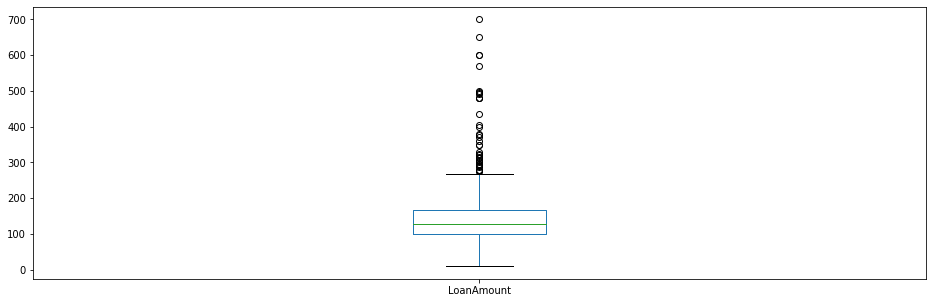

In [13]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

# Bivariate Analysis

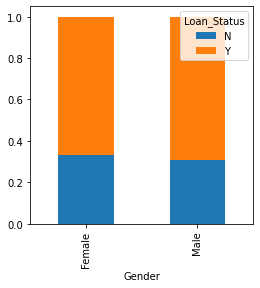

In [14]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

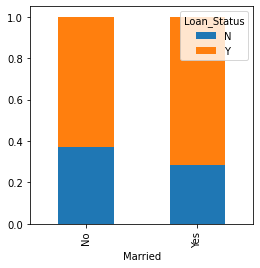

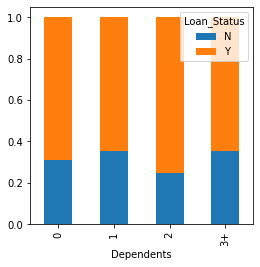

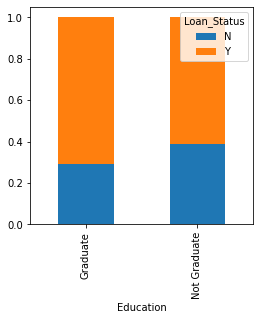

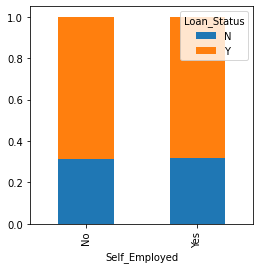

In [15]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

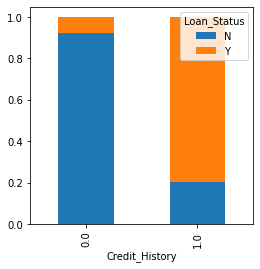

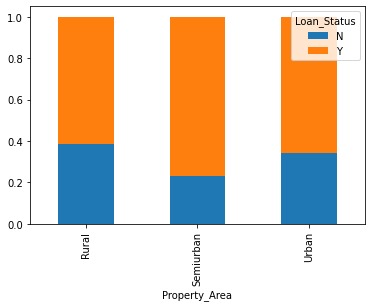

In [16]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

# Numerical Independent Variable vs Target Variable

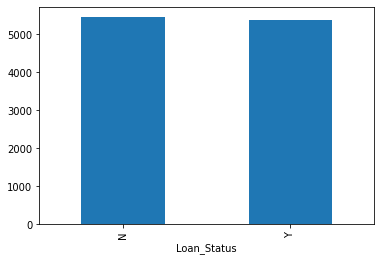

In [17]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

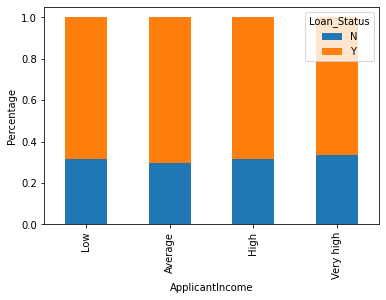

In [18]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

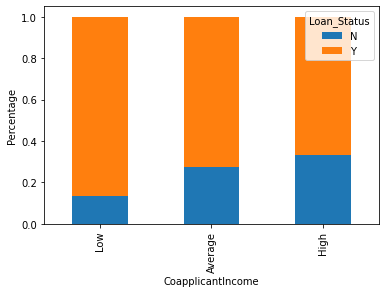

In [19]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

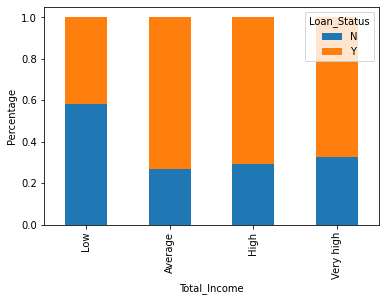

In [20]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

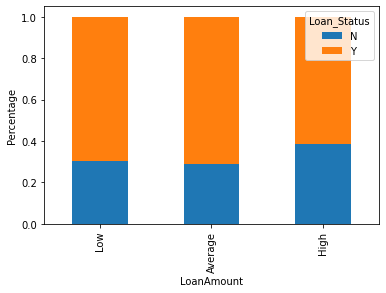

In [21]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

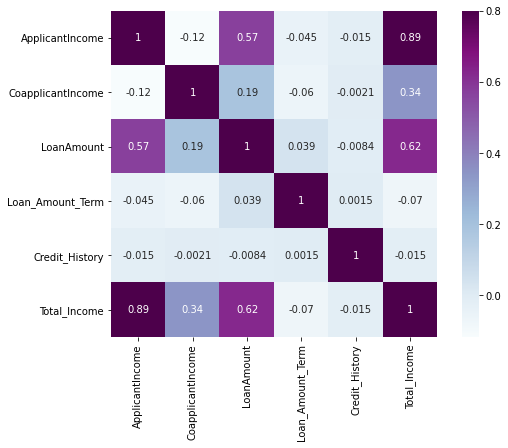

In [22]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

# Missing value imputation

In [23]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [24]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [25]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [26]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [27]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [28]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

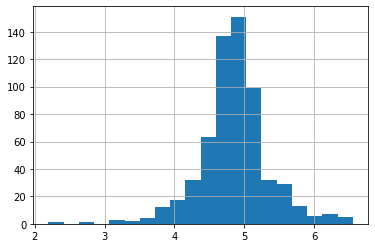

In [29]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)


# Ecoding the Non-Numerical to Numerical (Data Encoding)

In [30]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}
train = train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
#drop the uniques loan id
train.drop('Loan_ID',axis=True, inplace = True)


In [31]:

del train['LoanAmount_bin']
del train['Total_Income_bin']
del train['Coapplicant_Income_bin']

del train['Income_bin']

In [32]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_log
0,1,2,0,1,2,5849,0.0,128.0,360.0,1.0,3,1,5849.0,4.852030
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0,6091.0,4.852030
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1,3000.0,4.189655
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1,4941.0,4.787492
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1,6000.0,4.948760


# Model Building

In [33]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status


In [34]:
X=np.array(X)

# Logistic regression

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
#from sklearn.model_selection import GridSearchCV
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=26)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
ypred_l= model.predict(X_test)
#evaluation = f1_score(y_test, ypred_l)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, ypred_l)
cm

array([[11, 20],
       [ 4, 88]])

In [42]:
Log=accuracy_score(y_test, ypred_l)*100

In [43]:
data={'y_test':y_test,'pred':ypred_l}
pd.DataFrame(data=data)

,y_test,pred
324,1,1
278,1,1
523,1,0
410,0,1
339,1,1
...,...,...
328,0,1
464,0,0
456,1,1
295,1,1


In [44]:
print("Accuracy:",accuracy_score(y_test, ypred_l)*100)

Accuracy: 80.48780487804879


# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import os

In [46]:
dc=DecisionTreeClassifier(criterion="entropy",random_state=0)
dc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [47]:
ypred_d = dc.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
dec=accuracy_score(y_test,ypred_d)*100

In [49]:
data={'y_test':y_test,'pred':ypred_d}
pd.DataFrame(data=data)

,y_test,pred
324,1,1
278,1,1
523,1,1
410,0,1
339,1,1
...,...,...
328,0,1
464,0,0
456,1,1
295,1,1


In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, ypred_d)*100)

Accuracy: 74.79674796747967


# Random Forest Classifer

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc= RandomForestClassifier()

In [53]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
ypred_r = rfc.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_r)
cm

array([[12, 19],
       [ 3, 89]])

In [56]:

# Check Accuracy 
from sklearn.metrics import accuracy_score
rf=accuracy_score(y_test,ypred_r)*100

In [57]:
data={'y_test':y_test,'pred':ypred_r}
pd.DataFrame(data=data)

,y_test,pred
324,1,1
278,1,1
523,1,0
410,0,1
339,1,1
...,...,...
328,0,1
464,0,0
456,1,1
295,1,1


In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, ypred_r)*100)

Accuracy: 82.11382113821138
